<a href="https://colab.research.google.com/github/sonsiho/PythonForEngineer/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import thư viện cần thiết

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dữ liệu vào Dataframe

In [2]:
df=pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Train/train.csv')

# Tiền xử lý dữ liệu

## Kiểm tra dữ liệu trùng

In [3]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


## Drop dữ liệu trùng

In [4]:
df.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


## Kiểm tra dữ liệu có cell null không

In [5]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

## Xóa dữ liệu trùng Cột Postal Code

In [6]:
df[df['Postal Code'].isnull()]
df['Postal Code'] = df['Postal Code'].fillna('L7L 0A1')
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

## Chuẩn hóa dữ liệu ngày tháng cột Order Date và Ship Date

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')

## Sort lại dữ liệu ngày đặt

In [8]:
df.sort_values(by=['Order Date'],inplace=True)

## Thêm các cột cần thiết

In [9]:
order_day = df['Order Date'].dt.day
order_month = df['Order Date'].dt.month
order_year = df['Order Date'].dt.year

df['day'] = order_day
df['month'] = order_month
df['year'] = order_year

# Vẽ biểu đồ thể hiện biến động doanh số theo tháng. Cho biết doanh thu trung bình trong 3 tháng gần nhất

## Biểu đồ biến động doanh số theo tháng

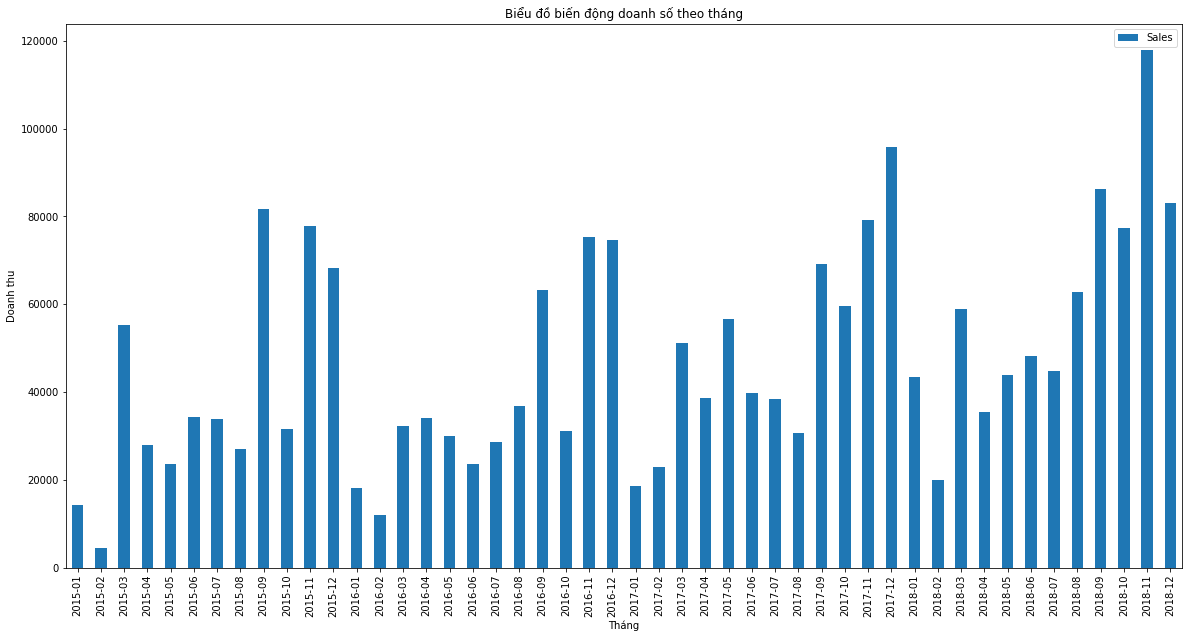

In [10]:
df_revenue_by_month = df[['Order Date','Sales']].groupby(df['Order Date'].dt.to_period('M')).sum().reset_index().set_index(['Order Date'])

df_revenue_by_month.plot(kind='bar',figsize = (20,10),xlabel= 'Tháng',ylabel='Doanh thu',title='Biểu đồ biến động doanh số theo tháng')

## Doanh thu trung bình trong 3 tháng gần nhất

In [11]:
# Sort giảm dần theo ngày đặt
df_avg_last_3_month = df_revenue_by_month.sort_values(by=['Order Date'],ascending=False)

avg_last_3_month = df_avg_last_3_month.head(3)['Sales'].mean()

Doanh thu trung bình trong 3 tháng gần nhất là:

In [12]:
avg_last_3_month

92805.55833333333

# Vẽ biểu đồ doanh số bán hàng theo quý và cho biết quý nào có tổng doanh số cao nhất?

## Biểu đồ doanh số bán hàng theo quý

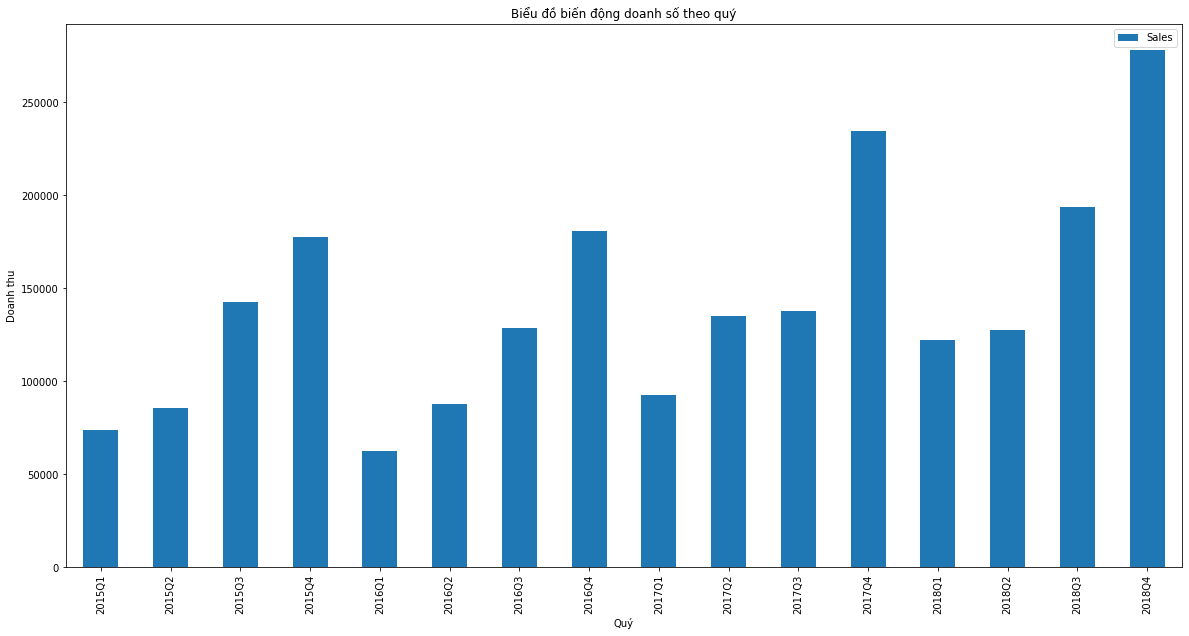

In [13]:
# Bổ sung cột quarter
df['quarter'] = df['Order Date'].dt.to_period('Q')

df_by_quarter = df[['Order Date','Sales']].groupby(df['Order Date'].dt.to_period('Q')).sum().reset_index().set_index(['Order Date'])

df_by_quarter.plot(kind='bar',figsize = (20,10),xlabel= 'Quý',ylabel='Doanh thu',title='Biểu đồ biến động doanh số theo quý')

## Quý có tổng doanh số cao nhất


In [14]:
df_by_quarter = df_by_quarter.sort_values(by=['Sales'],ascending=False)

df_by_quarter.head(1)

,Sales
Order Date,
2018Q4,278416.675


Quý có tổng doanh số cao nhất là:

Quý 4 năm 2018 với số tiền là 278416.675 

# Tính thời gian giao hàng trung bình theo từng tháng và vẽ biểu đồ mô tả sự biến thiên của con số này.

## Tính thời gian giao hàng trung bình (ship date - order date) theo từng tháng

In [15]:
# Thêm cột thời gian giao hàng
df['Time Ship'] = df['Ship Date'] - df['Order Date']
df['Month Id'] = df['Order Date'].dt.to_period('M')

df_time_ship_by_month = df.groupby(['Month Id'])['Time Ship'].mean().reset_index().set_index(['Month Id'])

Thời gian giao hàng trung bình theo từng tháng là:

In [16]:
df_time_ship_by_month

,Time Ship
Month Id,
2015-01,4 days 04:40:31.168831168
2015-02,4 days 04:10:26.086956521
2015-03,3 days 23:03:53.766233766
2015-04,4 days 00:22:09.230769230
2015-05,3 days 19:14:22.809917355
2015-06,4 days 05:07:47.175572519
2015-07,3 days 20:16:54.084507042
2015-08,4 days 02:08:13.150684931
2015-09,4 days 01:20:53.932584269


## Biểu đồ mô tả sự biến thiên của con số này.

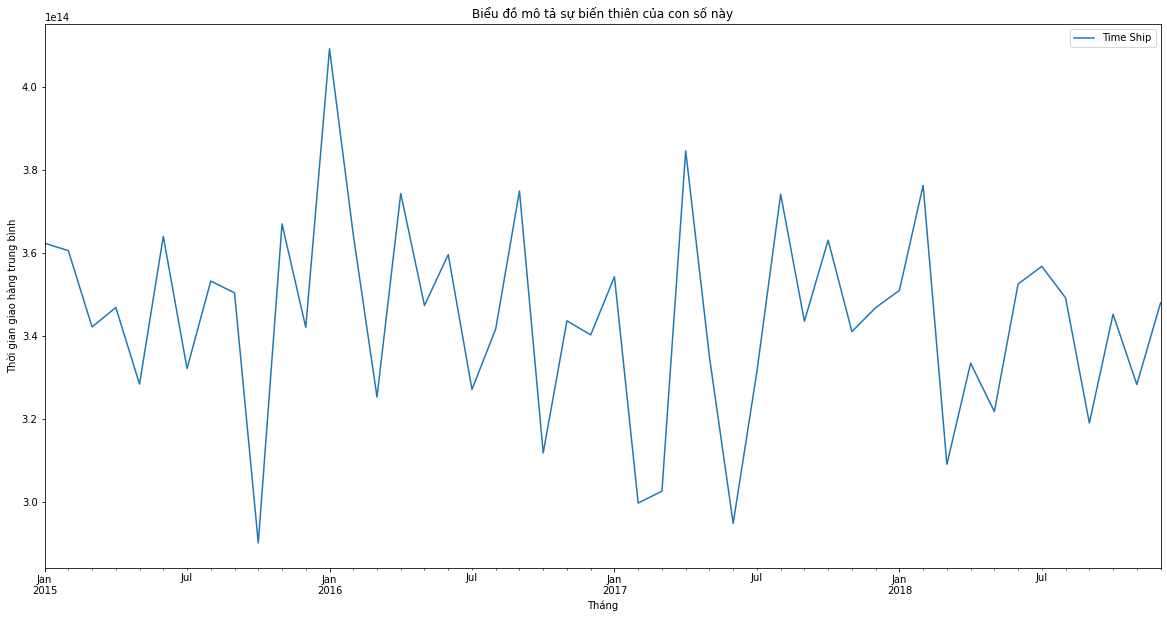

In [17]:
df_time_ship_by_month.plot(kind='line',figsize = (20,10),xlabel= 'Tháng',ylabel='Thời gian giao hàng trung bình',title='Biểu đồ mô tả sự biến thiên của con số này')

# Vẽ biểu đồ thể hiện sức mua theo từng thành phố. Cho biết top 3 thành phố có doanh số thấp nhất và 3 thành phố có doanh số cao nhất.

## Vẽ biểu đồ thể hiện sức mua theo từng thành phố.

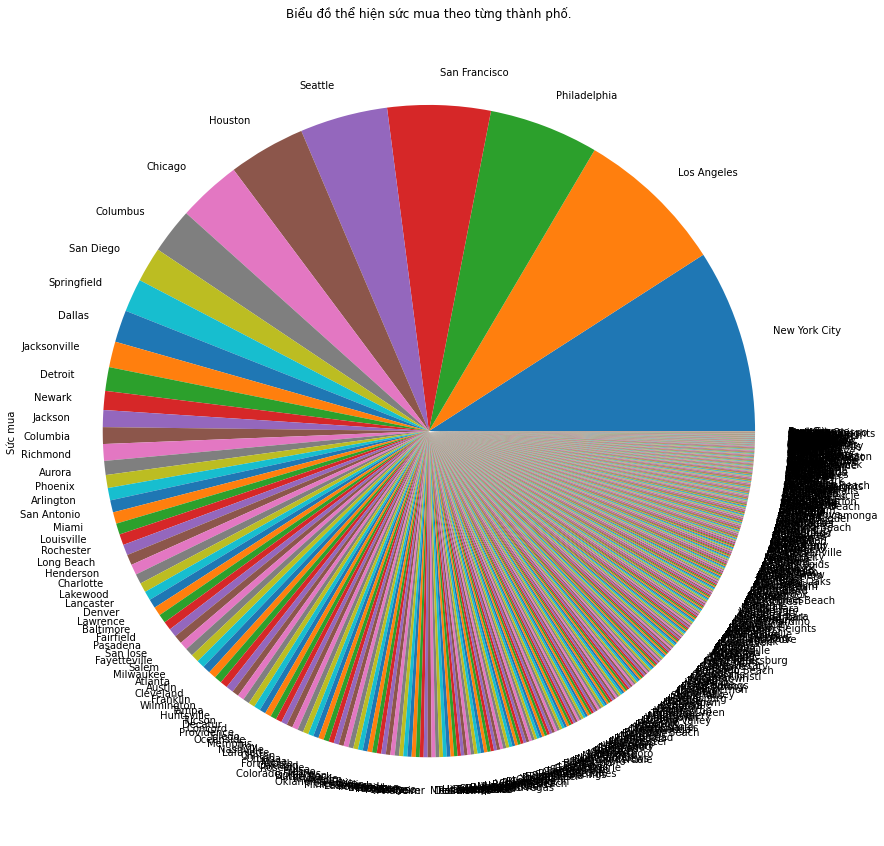

In [18]:
df['City'].value_counts().plot(kind='pie',figsize = (20,15),xlabel= 'Thành phố',ylabel='Sức mua',title='Biểu đồ thể hiện sức mua theo từng thành phố.')

## 3 thành phố có doanh số thấp nhất và 3 thành phố có doanh số cao nhất

In [19]:
df_revenue_by_city = df.groupby(['City'])['Sales'].sum()

3 thành phố có doanh số thấp nhất là

In [20]:
df_revenue_by_city.sort_values(ascending=True).head(3)

City
Abilene    1.392
Elyria     1.824
Jupiter    2.064
Name: Sales, dtype: float64

3 thành phố có doanh số cao nhất là

In [21]:
df_revenue_by_city.sort_values(ascending=False).head(3)

City
New York City    252462.547
Los Angeles      173420.181
Seattle          116106.322
Name: Sales, dtype: float64

# Vẽ biểu đồ thể hiện tỉ trọng doanh số theo bang (state) và cho biết trung bình doanh số của 5 bang dẫn đầu về sức mua

## Vẽ biểu đồ thể hiện tỉ trọng doanh số theo bang (state)

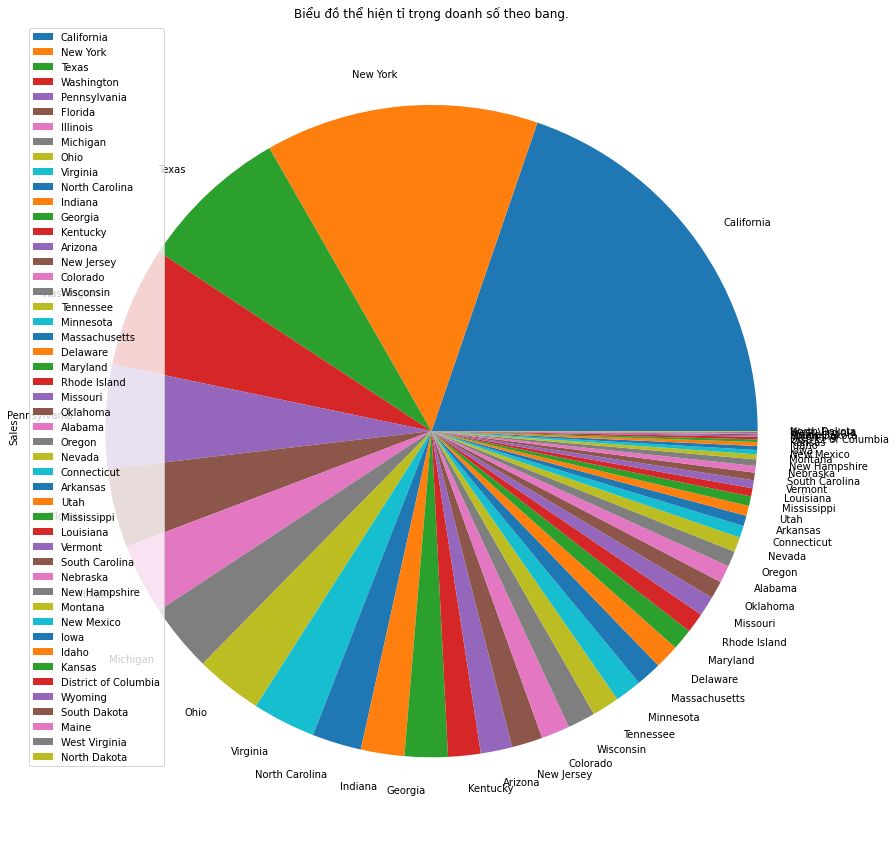

In [22]:
df_revenue_by_state = df.groupby(['State'])['Sales'].sum().reset_index().set_index(['State']).sort_values('Sales',ascending=False)
df_revenue_by_state=df_revenue_by_state[['Sales']].round(2)

df_revenue_by_state.plot(kind='pie',figsize = (20,15),y='Sales',title='Biểu đồ thể hiện tỉ trọng doanh số theo bang.')

## Trung bình doanh số của 5 bang dẫn đầu về sức mua

In [23]:
# 5 bang dẫn đầu về sức mua
df_avg_revenue_of_top_5_state_by_purchasing_power = df.groupby(['State'])['Sales']\
                                        .aggregate(['median','count'])\
                                        .sort_values('count',ascending=False)\
                                        .head(5)

df_avg_revenue_of_top_5_state_by_purchasing_power

,median,count
State,,
California,61.040,1946
New York,60.450,1097
Texas,36.288,973
Pennsylvania,41.786,582
Washington,65.940,504


# Cho biết các bang dẫn đầu doanh số theo từng vùng (east, west, south, central,..).

In [108]:

df_region_state_sales = df.groupby(['Region','State'])['Sales']\
                            .sum()\
                            .reset_index()\

df_region_state_sales = df_region_state_sales.assign(
        rn=df_region_state_sales.sort_values(["Sales"], ascending=False)
        .groupby(["Region"])
        .cumcount()
        + 1
    )\
    .query("rn < 2")\
    .sort_values(["Sales", "rn"],ascending=[False,True])

df_region_state_sales


,Region,State,Sales,rn
39,West,California,446306.4635,1
21,East,New York,306361.1470,1
11,Central,Texas,168572.5322,1
29,South,Florida,88436.5320,1


# Cho biết top 3 sản phẩm có doanh thu cao nhất và top 3 sản phẩm có số lượng đơn vị bán ra cao nhất


## Top 3 sản phẩm có doanh thu cao nhất



In [116]:
#Top 3 sản phẩm có doanh thu cao nhất
df_top3_product_best_revenue = df.groupby(["Product ID"])["Sales"].sum()\
                                  .reset_index()\
                                  .sort_values(["Sales"],ascending=False)\
                                  .head(3)

df_top3_product_best_revenue

,Product ID,Sales
1613,TEC-CO-10004722,61599.824
776,OFF-BI-10003527,27453.384
1641,TEC-MA-10002412,22638.480


## Top 3 sản phẩm có số lượng đơn vị bán ra cao nhất



In [125]:
#Top 3 sản phẩm có doanh thu cao nhất
df_top3_product_best_power = df.groupby(["Product ID"])["Sales"].count()\
                                  .reset_index()\
                                  .sort_values(["Sales"],ascending=False)\
                                  .head(3)

df_top3_product_best_power

,Product ID,Sales
1144,OFF-PA-10001970,19
1568,TEC-AC-10003832,18
295,FUR-FU-10004270,16


# Vẽ biểu đồ thể hiện tỉ trọng doanh số của từng category

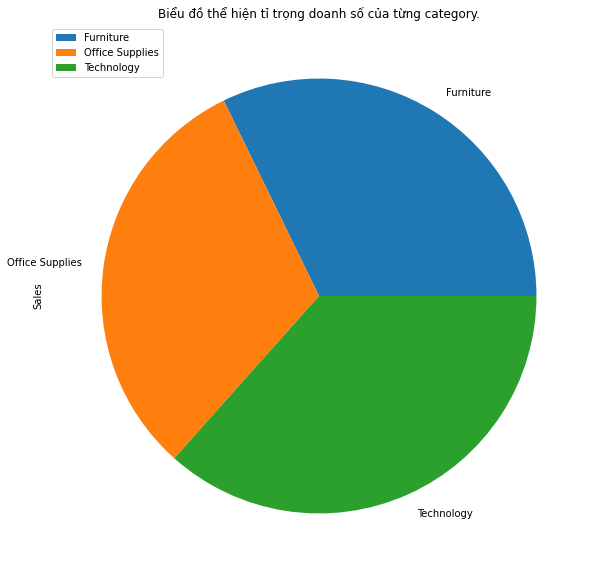

In [134]:
df_category = df.groupby(["Category"]).sum().reset_index().set_index(['Category'])
df_category
df_category.plot(kind='pie',figsize = (15,10),y='Sales',x='Category',title='Biểu đồ thể hiện tỉ trọng doanh số của từng category.')

# Dự báo doanh số theo nhiều khía cạnh khác nhau trong tương lai: theo vùng, theo bang, theo category,..  và phát hành API để khai thác.